<a href="https://colab.research.google.com/github/nvrancovich/gh22-twitter-sentiment-analysis/blob/main/notebooks/menciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

pd.set_option('display.max_colwidth', None)

In [ ]:
url = 'https://drive.google.com/file/d/1IklQ716OMB-ZYETa4NZM6Eq7cJnrDzOK/view?usp=share_link'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url, index_col=0)

In [ ]:
df.head(1)

,Date,Tweet
0,2022-12-08 11:03:54+00:00,Porque siento que Agustín puede irse con el mismo o más porcentaje que Juan? #GH2022 #GH22


La hora está adelantada 3 horas respecto a la de Argentina

In [ ]:
df.Date = pd.to_datetime(df.Date)
df.Date[0]

Timestamp('2022-12-08 11:03:54+0000', tz='UTC')

In [ ]:
df.Date = df.Date - pd.Timedelta(hours=3)
df.Date[0]

Timestamp('2022-12-08 08:03:54+0000', tz='UTC')

Sacando las palabras más frequentes

In [ ]:
import nltk
from IPython.display import clear_output
import itertools

In [ ]:
pattern = r'''(?x)                  # Flag para iniciar el modo verbose
              (?:[A-Z]\.)+            # Hace match con abreviaciones como U.S.A.
              | \w+(?:-\w+)*         # Hace match con palabras que pueden tener un guión interno
              | \$?\d+(?:\.\d+)?%?  # Hace match con dinero o porcentajes como $15.5 o 100%
              | \.\.\.              # Hace match con puntos suspensivos
              | [][.,;"'?():-_`]    # Hace match con signos de puntuación
'''

In [ ]:
%%time

tweets = list(df.Tweet)
tweets = tweets[:2000]

print((len(tweets)*0.01175)/60)

for tweet in tweets:
  tweets[tweets.index(tweet)] = nltk.regexp_tokenize(tweet, pattern)

0.39166666666666666
CPU times: user 136 ms, sys: 3.15 ms, total: 139 ms
Wall time: 208 ms


In [ ]:
import urllib

txt = urllib.request.urlopen('https://raw.githubusercontent.com/Alir3z4/stop-words/master/spanish.txt')
palabras_vacias = []
for word in txt:
  palabras_vacias.append(word.decode('UTF-8')[:-1])

In [ ]:
palabras = list(itertools.chain.from_iterable(tweets))
palabras = [palabra for palabra in palabras if len(palabra) > 3]
palabras = [palabra for palabra in palabras if palabra not in palabras_vacias]
palabras = [palabra.lower() for palabra in palabras]

palabras = [palabra for palabra in palabras if 'gh' not in palabra]
palabras = [palabra for palabra in palabras if 'granh' not in palabra]
palabras = [palabra for palabra in palabras if 'https' not in palabra]

In [ ]:
conteo = nltk.FreqDist(palabras)

In [ ]:
palabras_frequentes = conteo.most_common(150)

In [ ]:
participantes = {
    'marcos':['marcos','marquitos','primo'],
    'tomas':['tomás','holder','tomas'],
    'julieta':['julieta','juli'],
    'coti':['coti','coty'],
    'daniela':['daniela','dani','pestañela'],
    'nacho':['nacho'],
    'agustin':['agustin','agustín','frodo','agus'],
    'maxi':['maxi'],
    'alexis':['alexis','cone','conejo'],
    'walter':['walter','alfa'],
    'romina':['romina','romi'],
    'thiago':['thiago'],
    'maria':['maria','cata'],
    'mora':['mora'],
    'lucila':['lucila','tora'],
    'juan':['juan'],
    'juliana':['juliana','tini']
}

In [ ]:
apodos = list(itertools.chain.from_iterable([participantes[participante] for participante in participantes]))

In [ ]:
menciones = [tupla for tupla in palabras_frequentes if tupla[0] in apodos]
conteo = {participante:0 for participante in participantes}
for tupla in menciones:
  for participante in participantes:
    if tupla[0] in participantes[participante]:
        conteo[participante] += tupla[1]

In [ ]:
conteo

{'marcos': 499,
 'tomas': 0,
 'julieta': 377,
 'coti': 150,
 'daniela': 102,
 'nacho': 232,
 'agustin': 473,
 'maxi': 101,
 'alexis': 87,
 'walter': 353,
 'romina': 180,
 'thiago': 249,
 'maria': 16,
 'mora': 0,
 'lucila': 0,
 'juan': 31,
 'juliana': 0}

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df_menciones = pd.DataFrame({'participante':[participante for participante in conteo],'menciones':[conteo[participante] for participante in conteo]})

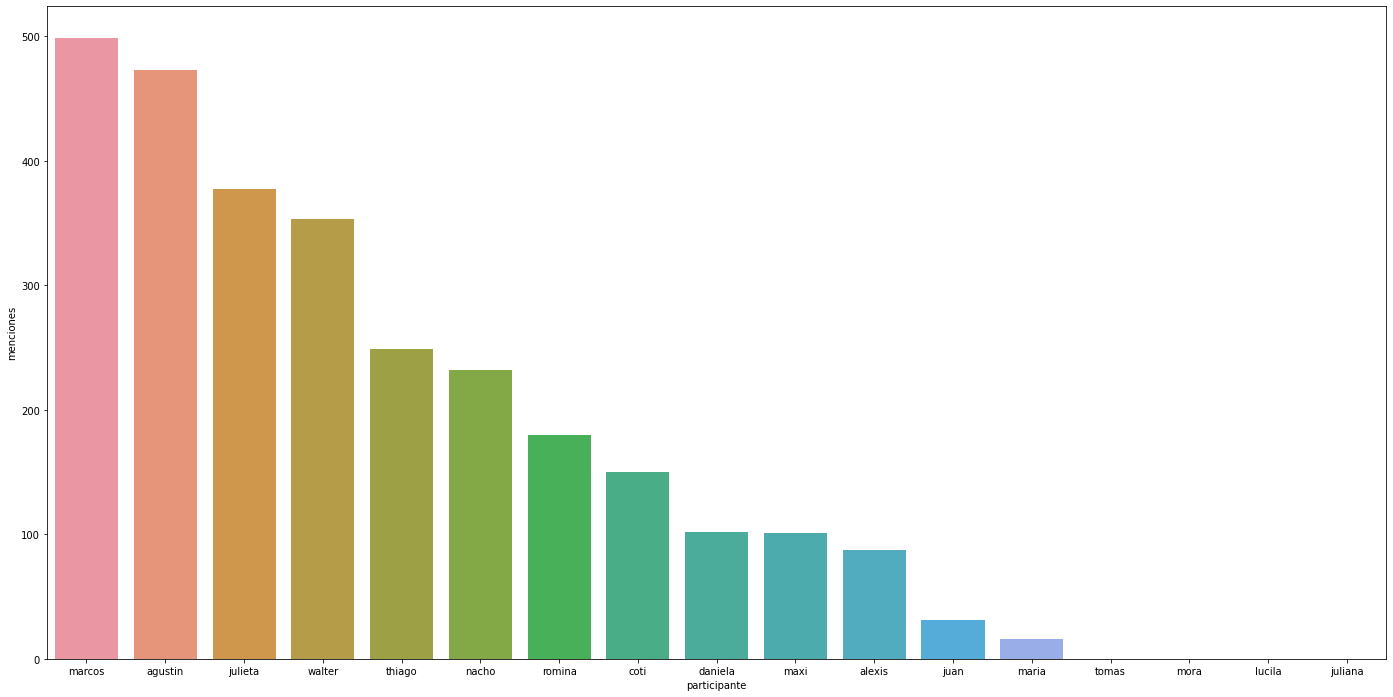

In [ ]:
plt.figure(figsize=(24,12))
sns.barplot(data=df_menciones, x='participante', y='menciones',order=df_menciones.sort_values('menciones', ascending=False).participante)
plt.show()

In [ ]:
import plotly.express as px

fig = px.bar(df_menciones, x='participante', y='menciones')
fig.show()